#  AllLife Bank Customer Segmentation

# Summary: 

- AllLife Bank wants to run personalized campaigns to target new customers as well as upsell to existing customers. 
- Also bank wants to improve the services provided as per imput from  the market research team.
- Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster.


# Objective :
- To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank,
- Using  clustering algorithms  provide recommendations to the bank on how to better market to and service these customers.

- Cluster profiling and pattern recognition for the simliar customers.


# Data Dictionary :

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

# Importing the Required modules


In [160]:
# this will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# See #1137: this allows compatibility for scikit-learn >= 0.24
from sklearn.utils import _safe_indexing

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [161]:
# loading the dataset
cdata = pd.read_excel("CreditCardCustomerData.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [162]:
cdata.sample(100)


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
288,289,49331,7000,5,2,2,4
121,122,25440,13000,3,0,5,10
330,331,17933,19000,6,3,1,2
486,487,95147,64000,4,2,2,2
147,148,95489,5000,2,2,5,6
...,...,...,...,...,...,...,...
454,455,84351,25000,4,3,0,2
193,194,18145,6000,2,2,5,8
503,504,82023,70000,6,3,0,0
653,654,51826,95000,10,0,15,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [163]:
cdata["Customer Key"].value_counts() > 2

50706    False
37252    False
97935    False
96929    False
47437    False
         ...  
58708    False
92501    False
33110    False
92503    False
75775    False
Name: Customer Key, Length: 655, dtype: bool

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [164]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [165]:
cdata.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [166]:
df=cdata.copy()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [167]:
# checking for missing values
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [168]:
df.drop(["Sl_No", "Customer Key"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Observation:

- In the initial Data profiling We dont find any missing values.
- There are few columns such as  Total_visits_bank	Total_visits_online	Total_calls_made ,who has minimum value but it seems ok as their might be customer who dont reach bank ,we can check more in EDA.
- Two columns Sl_No and Customer Key are identification number and no variblity found in it we may need to remove it .

- No  Missing value treatment or  Duplicate observations check


# EDA   DataSet and Customer Profiling :

In [169]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

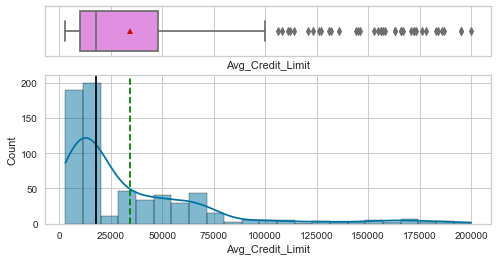

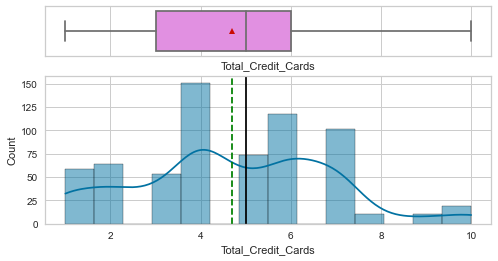

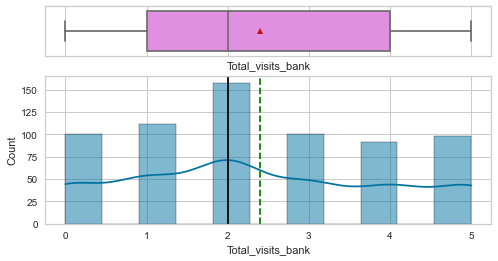

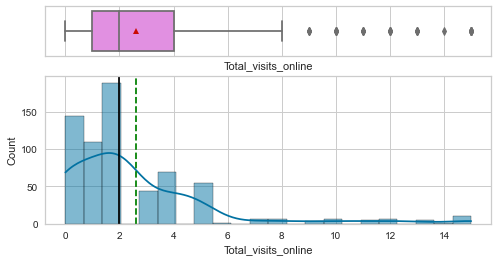

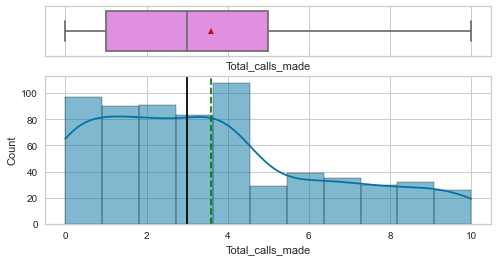

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [170]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item, kde=True, figsize=(8, 4))

In [171]:
# creating new column Biining credit limit
df["Avg_Credit_Limit"].describe()
df["Avg_Credit_Limit_BIN"] = pd.cut(
    df["Avg_Credit_Limit"],
    bins=[300, 20000, 40000, 60000, 80000, 100000, 200000],
    labels=["3-20K", "21-40K", "41-60K", "61-80K", "81-100K", ">100K"],
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [172]:
df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'Avg_Credit_Limit_BIN'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [173]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=20):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

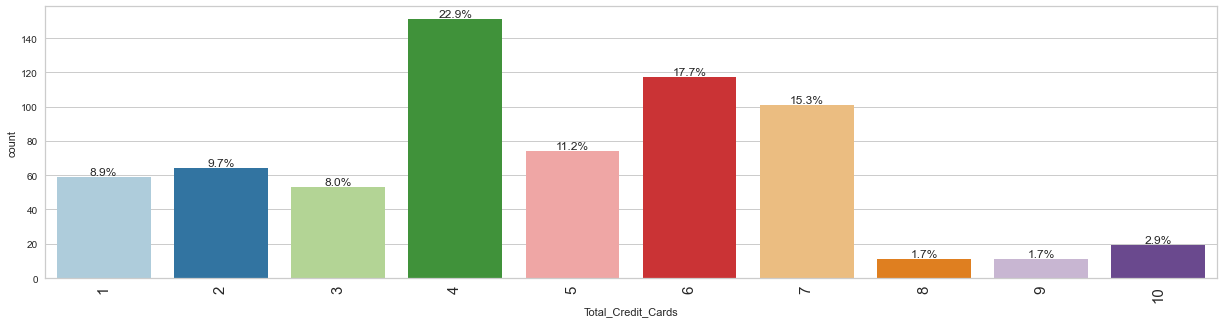

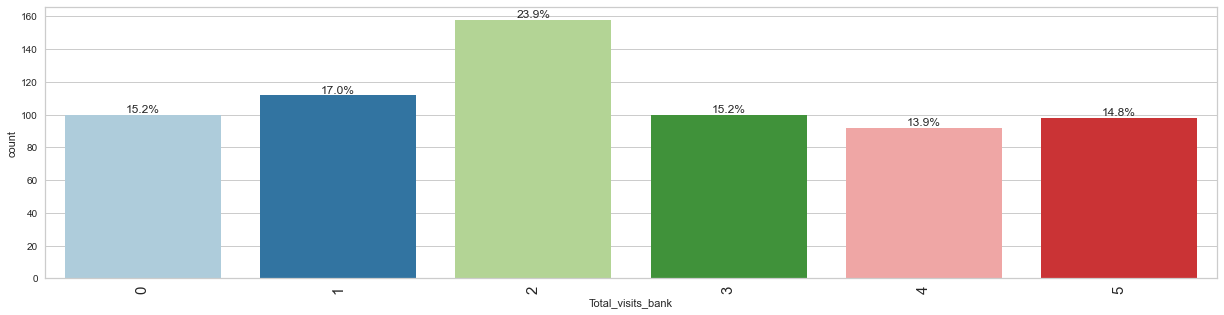

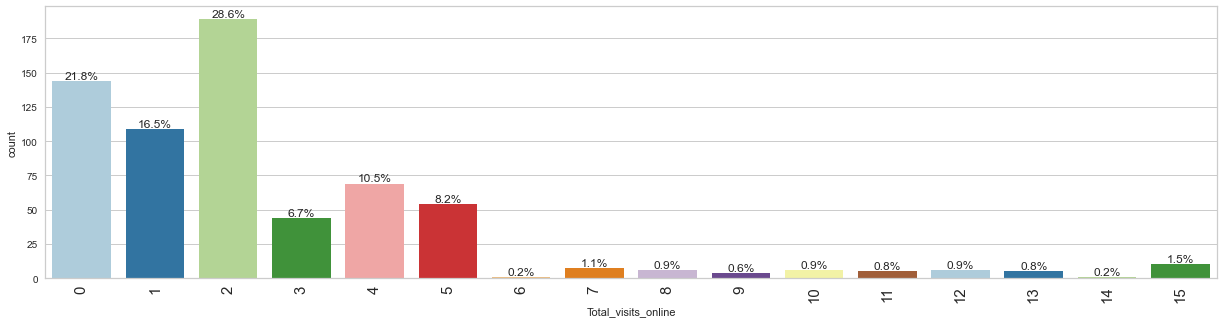

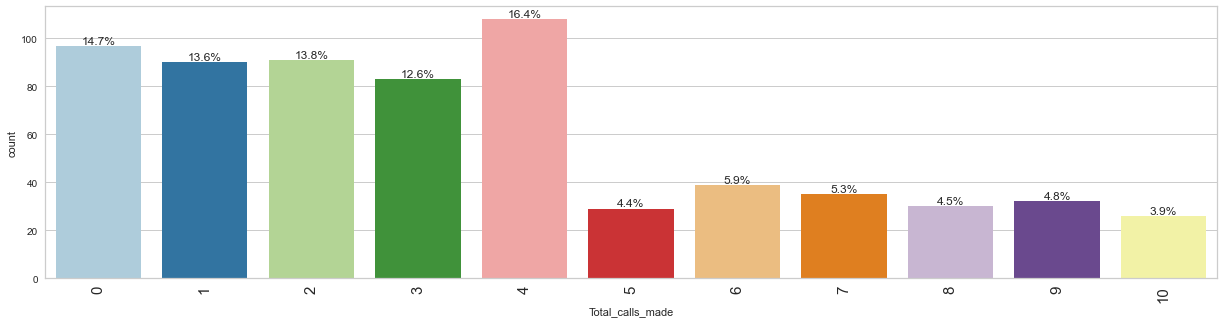

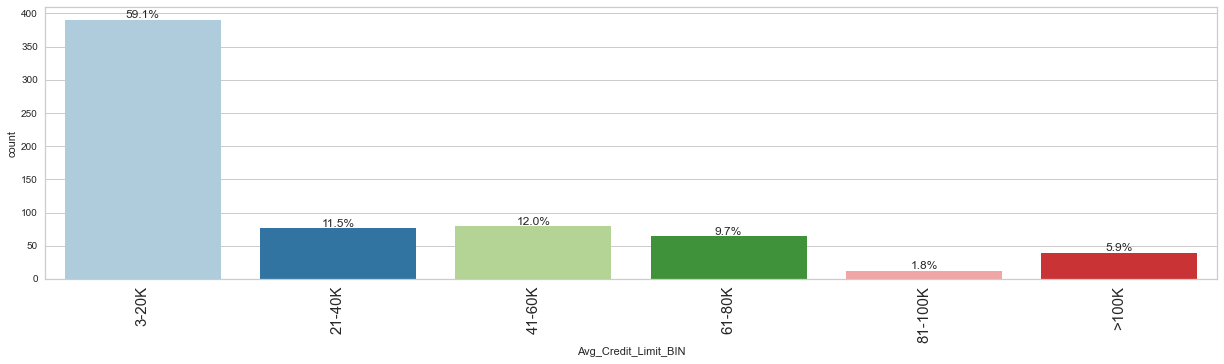

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [174]:
data_col = [
    "Total_Credit_Cards",
    "Total_visits_bank",
    "Total_visits_online",
    "Total_calls_made",
    "Avg_Credit_Limit_BIN",
]
for item in data_col:
    labeled_barplot(df, item, perc=True)

# Bivariate Analsysis :

In [175]:
# fundtion to check the distibution for the lable varaible with respect to numerical columns


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

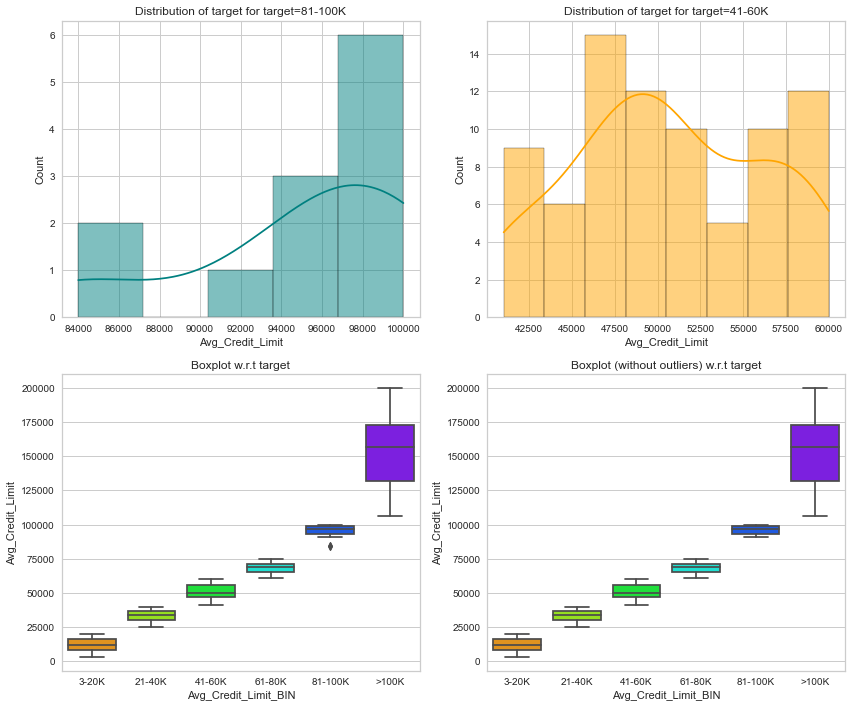

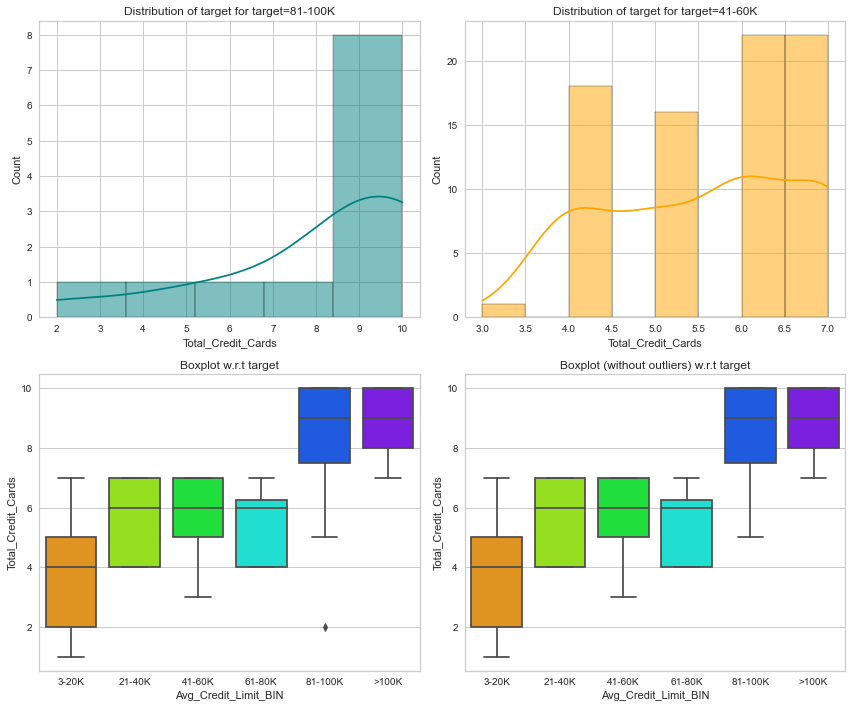

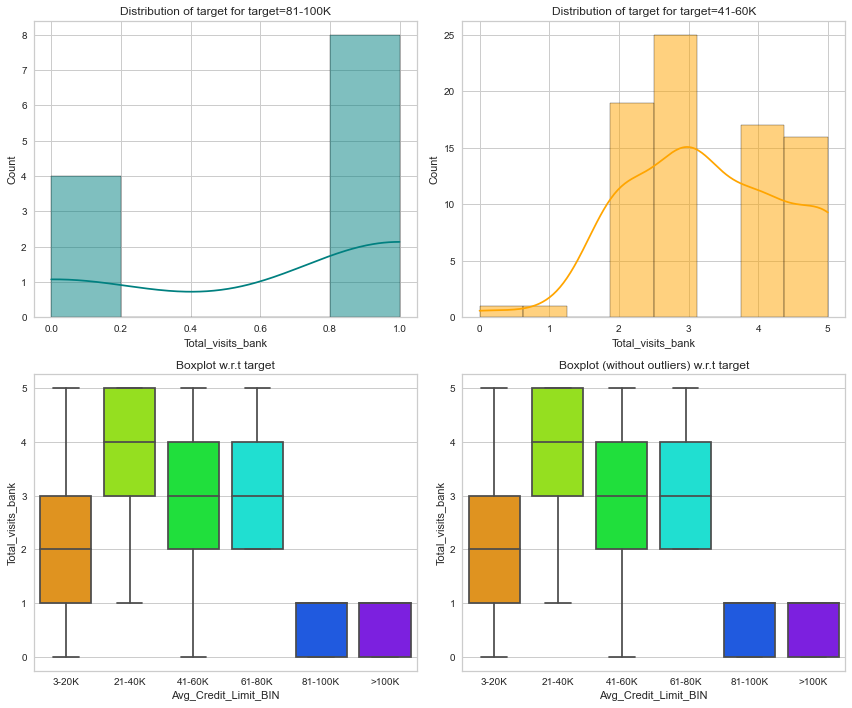

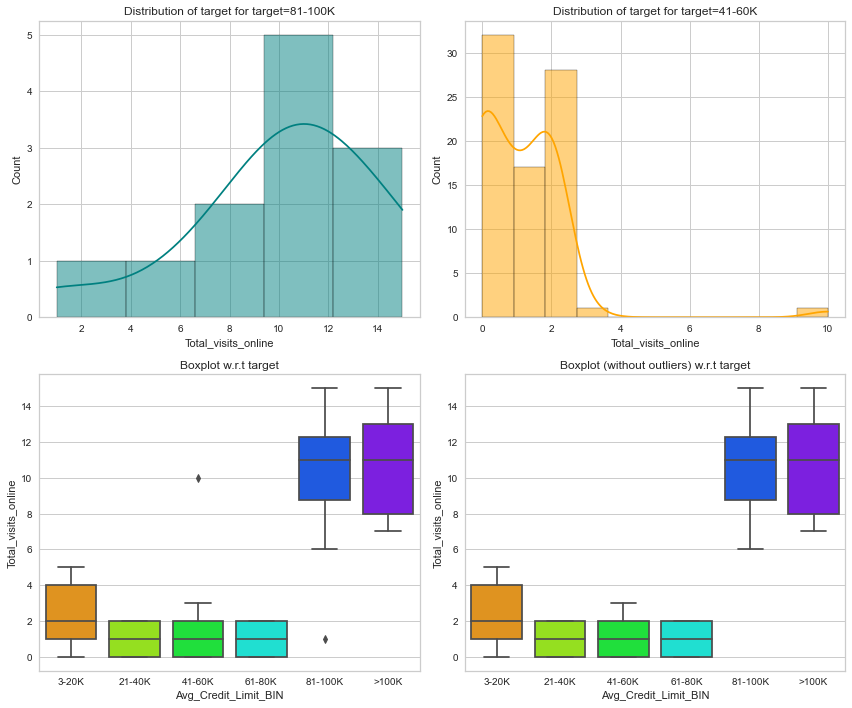

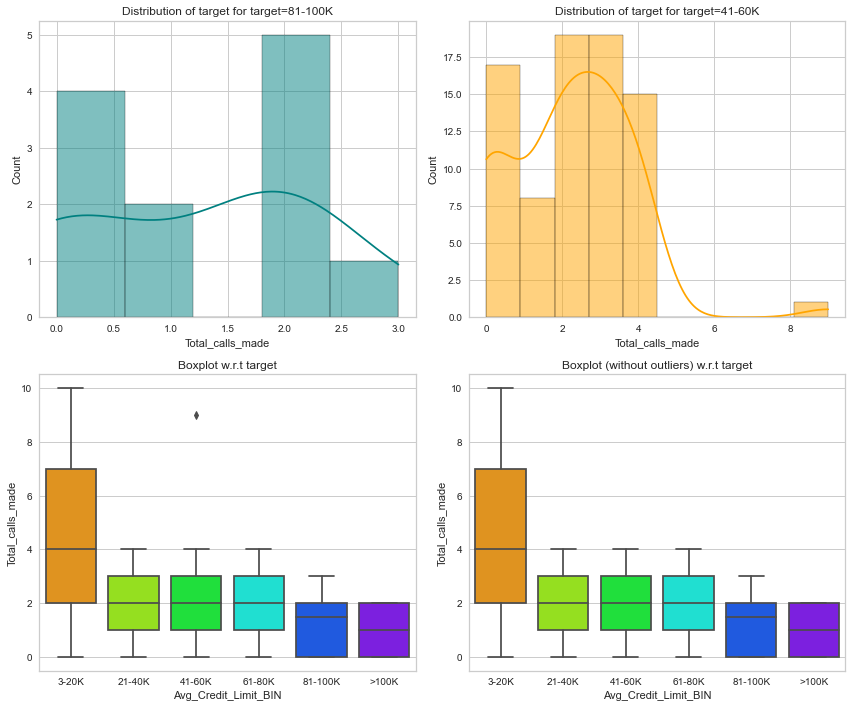

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [176]:
num_col
# print(num_col)
for col in df[num_col]:
    distribution_plot_wrt_target(df, col, "Avg_Credit_Limit_BIN")

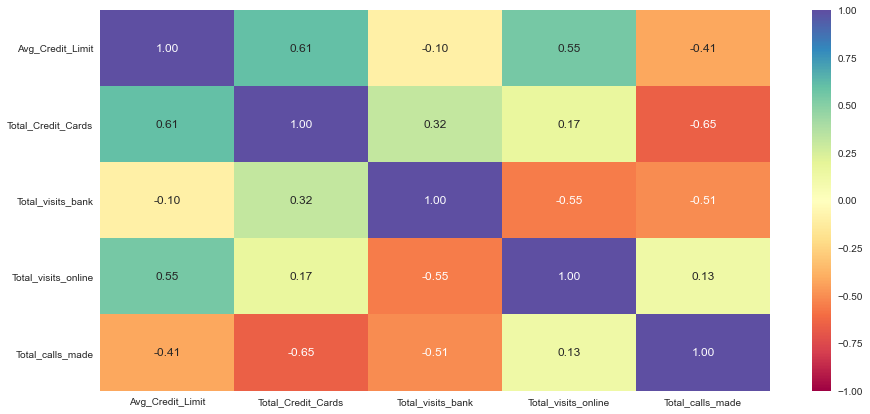

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [177]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

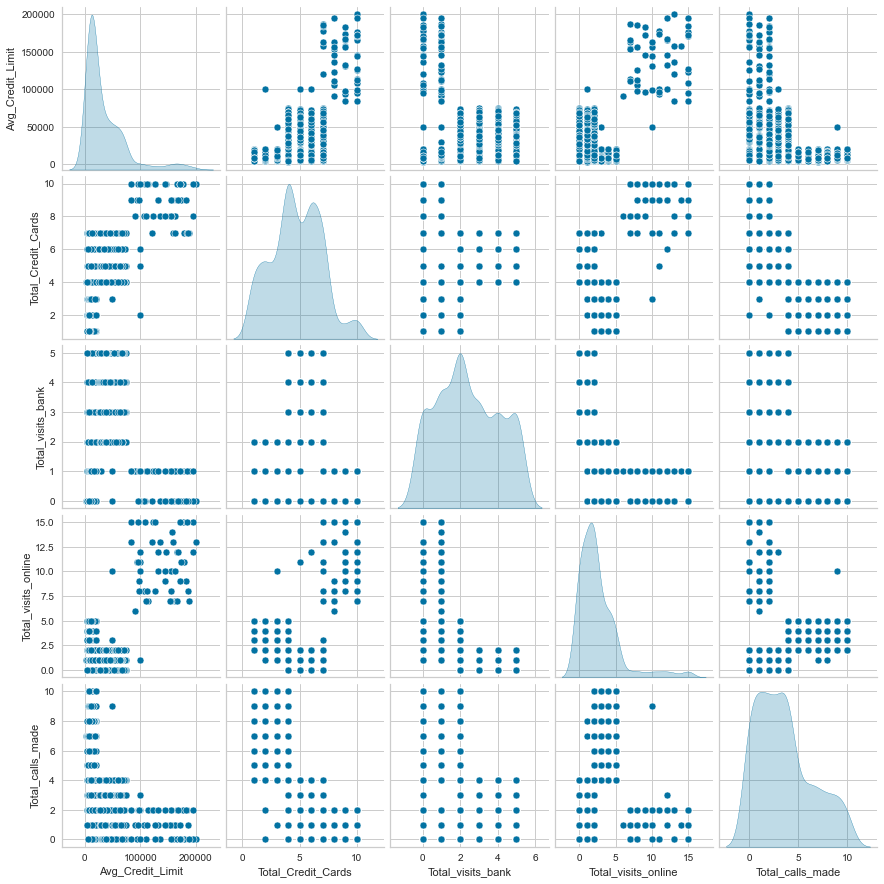

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [178]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

# Observations: 
-  'Avg_Credit_Limit'  and  'Total_visits_online' are two columns looks right skwed  with some outliers . oher columns looks normal distribution.
-  These two columns has outliers but those look related to data based on grouping and distribution .we will not tret them .
- We have binned the Avg_Credit_Limit value to understand customer behaviour and it seems that most of the customer  have Avg_Credit_Limit limit is 3-20K.
- also maximum customers are holding the 4-7 cedit cards.
- Most of ppl who made 2 time visite to bank and  most of cusomers are using online medium and have less credit card .
- Cutomers having 9-10 credit card  have  higher credit limit and prefer online medium to check services.
- most of customers between 21-40K have visitted bank  more times  then others ,credit limits customers.
- we can see distinctly co-realtion between credit card and credit limit.
- Customers with credit limit 3-20K are high in numer and have called most of time ,means  these low range customers are not happy with services or need extra attention.

#  K-means Clustering :

In [179]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [180]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 2.006922226250361
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774463
Number of Clusters: 5 	Average Distortion: 0.990772333470802
Number of Clusters: 6 	Average Distortion: 0.9429941050258731
Number of Clusters: 7 	Average Distortion: 0.9095870398040661
Number of Clusters: 8 	Average Distortion: 0.8891227471298538


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

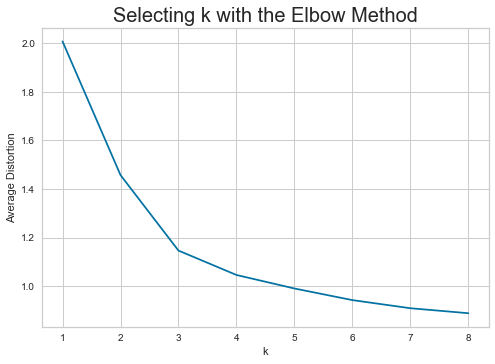

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [181]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2723916744634915
For n_clusters = 6, silhouette score is 0.2552120210579483
For n_clusters = 7, silhouette score is 0.24805763002952325
For n_clusters = 8, silhouette score is 0.22678995987558667
For n_clusters = 9, silhouette score is 0.2185600720172006


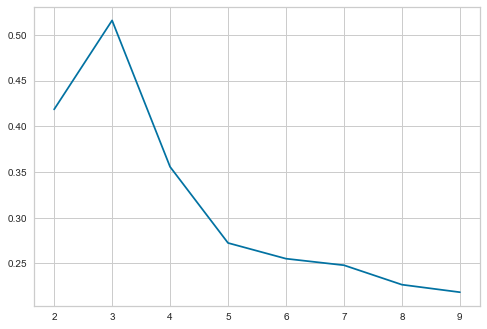

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [182]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

E:\SoftWare\Ananconda\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


SilhouetteVisualizer(ax=<AxesSubplot:>, model=None)

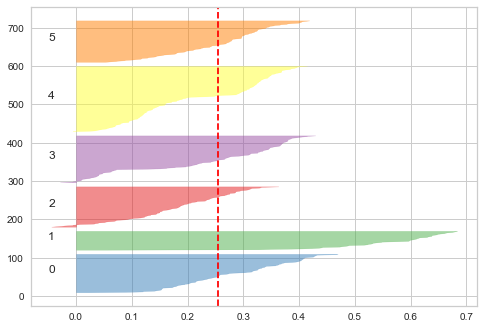

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [183]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
# visualizer.show()

E:\SoftWare\Ananconda\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


SilhouetteVisualizer(ax=<AxesSubplot:>, model=None)

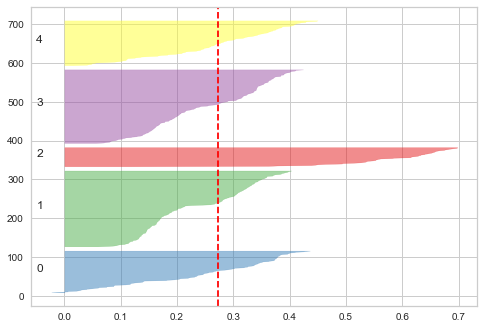

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [184]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)


E:\SoftWare\Ananconda\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


SilhouetteVisualizer(ax=<AxesSubplot:>, model=None)

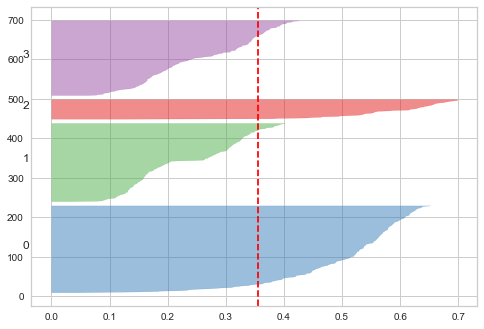

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [185]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)


E:\SoftWare\Ananconda\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


SilhouetteVisualizer(ax=<AxesSubplot:>, model=None)

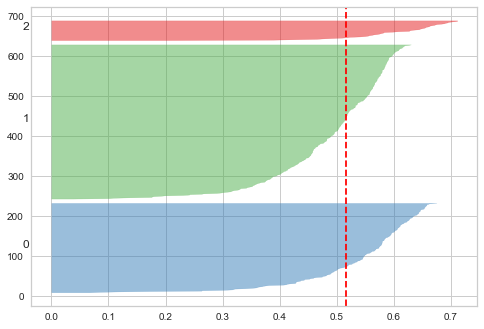

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [186]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)


In [187]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [188]:
df["label"] = kmeans.labels_
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_BIN,label
0,100000,2,1,1,0,81-100K,0
1,50000,3,0,10,9,41-60K,1
2,50000,7,1,3,4,41-60K,0
3,30000,5,1,1,4,21-40K,0
4,100000,6,0,12,3,81-100K,2
...,...,...,...,...,...,...,...
655,99000,10,1,10,0,81-100K,2
656,84000,10,1,13,2,81-100K,2
657,145000,8,1,9,1,>100K,2
658,172000,10,1,15,0,>100K,2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Observations: 
-	I have used  K=10 cluster range and  step wise distortion rate as cluster grew.
-	Also plotted the Elbow joint plot to check appropriate cluster, I can see at cluster level 3 distortion going in slope and not much variance can be seen in curve .

-	 To validate the number of cluster I have also checked the   silhouette coefficient for multiple cluster values and at level 3 we can see good silhouette coefficient.

-	I plot the silhouette coefficient and same cluster =3 value gives the good coefficient value .

-	I  labeled  the clusters and add in DF to do cluster profiling. 




# Cluster Profiling KMeans: 

In [189]:
cluster_profile1 = df.groupby("label").mean()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [190]:
cluster_profile1["count_in_each_segment"] = (
    df.groupby("label")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [191]:
df.label.value_counts()

0    386
1    224
2     50
Name: label, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [192]:
# let's display cluster profiles
cluster_profile1.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
label,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

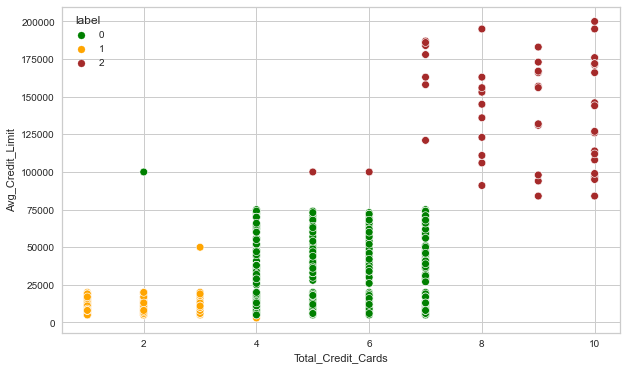

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [193]:
# Scatterplot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Total_Credit_Cards",
    y="Avg_Credit_Limit",
    hue="label",
    palette=["green", "orange", "brown"],
    legend="full",
    data=df,
    s=60,
)
plt.xlabel("Total_Credit_Cards")
plt.ylabel("Avg_Credit_Limit")

plt.show()

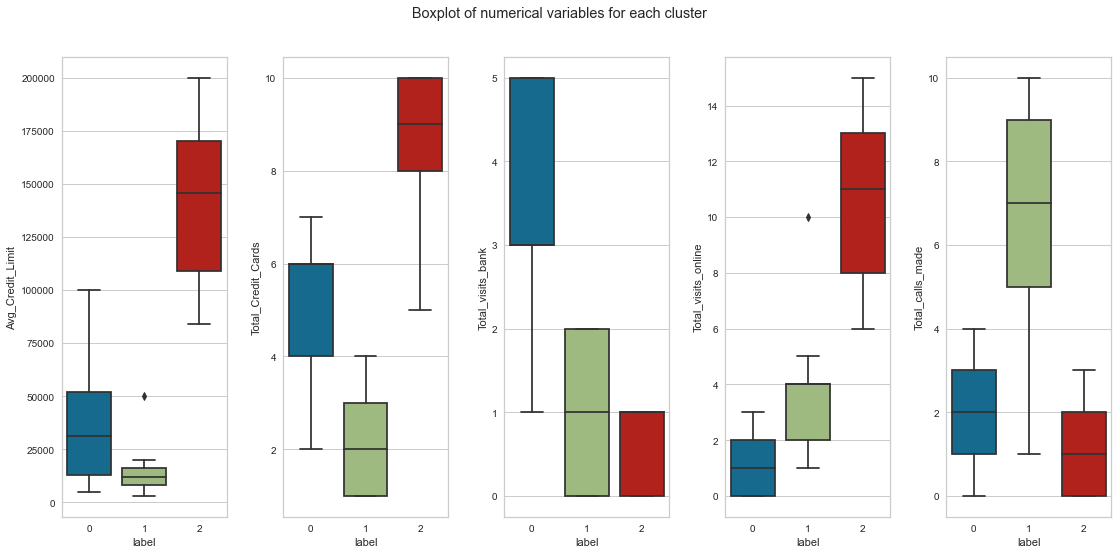

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [194]:
fig, axes = plt.subplots(1, 5, figsize=(16, 8))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for i in range(5):
    sns.boxplot(ax=axes[i], y=df[num_col[counter]], x=df["label"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

Text(0.5, 1.0, 'Cluster Wise Customer Distribution')

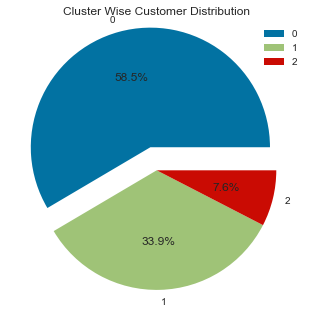

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [195]:
sizes = [368, 224, 50]
plt.pie(
    cluster_profile1["count_in_each_segment"],
    labels=[0, 1, 2],
    explode=[0.2, 0, 0],
    autopct="%1.1f%%",
)
plt.legend()
plt.title("Cluster Wise Customer Distribution")

# Observations :
-	During the cluster profiling, I have checked and plotted highlight matrix to check group and max mean values.

-	Customers with group 0 contribute to 58.5% to total customer counts ,bank should focus on these customers.

--	Cluster Group 0 :
-	 Max customers belong to Cluster 0 and are mean credit limit of ~33K, but these are the customers, who visit the bank more. Bank need to check service provide to these customers and reason for their visit.
-	Also these customers are less using online services, we need to check reason for this based on other parameters (Age etc.).

--	Cluster Group 1 :
-	These are the Low credit limit customers and second large group after cluster 0.
-	These customers are using less  Avg.cards and have less bank visit rate and online use .
-	This are customer who are making more call to bank 

--	Cluster Group 2 :
-	These are the high credit limit customers with high avg.cards .
-	These customers are using very less bank visit and have less bank call rate.
-	This are customer who are making more online visits and to bank.
-	we need to check reason for this based on other parameters (Age ,occupations etc.).


# Hierarchical Clustering

In [196]:
from sklearn.cluster import AgglomerativeClustering

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [197]:
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_BIN,label
0,100000,2,1,1,0,81-100K,0
1,50000,3,0,10,9,41-60K,1
2,50000,7,1,3,4,41-60K,0
3,30000,5,1,1,4,21-40K,0
4,100000,6,0,12,3,81-100K,2
...,...,...,...,...,...,...,...
655,99000,10,1,10,0,81-100K,2
656,84000,10,1,13,2,81-100K,2
657,145000,8,1,9,1,>100K,2
658,172000,10,1,15,0,>100K,2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [198]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [199]:
from scipy.spatial.distance import pdist  # Pairwise distribution between data points

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [200]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553606.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5422791209801747.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042134.
Cophenetic co

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [201]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [202]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(subset_scaled, metric="euclidean", method="average")
c, coph_dists = cophenet(Z, pdist(subset_scaled))

c

0.8977080867389372

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

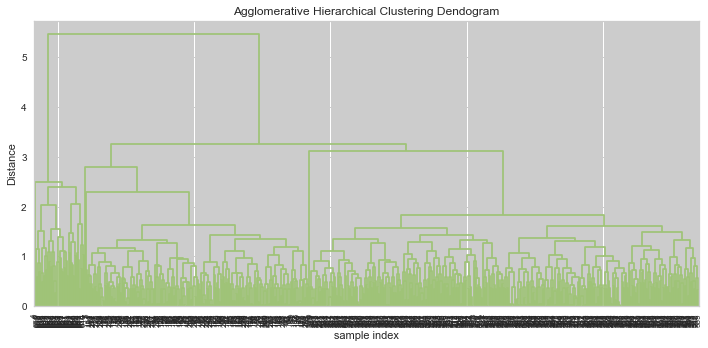

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [203]:
plt.figure(figsize=(10, 5))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90.0, color_threshold=40, leaf_font_size=8.0)
plt.tight_layout()

In [204]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(subset_scaled, metric="euclidean", method="complete")
c, coph_dists = cophenet(Z, pdist(subset_scaled))

c

0.8599730607972423

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

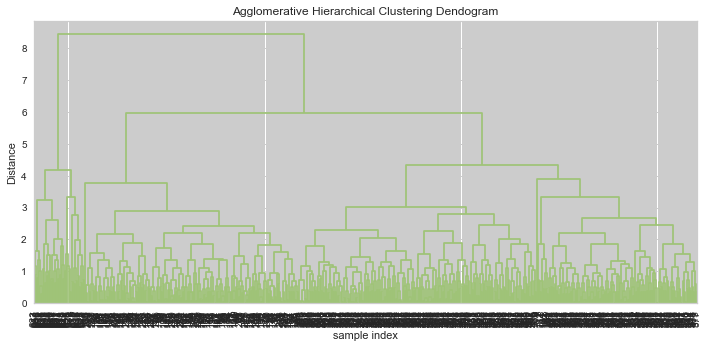

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [205]:
plt.figure(figsize=(10, 5))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90.0, color_threshold=90, leaf_font_size=10.0)
plt.tight_layout()

In [206]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(subset_scaled, metric="euclidean", method="ward")
c, coph_dists = cophenet(Z, pdist(subset_scaled))

c

0.7415156284827493

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

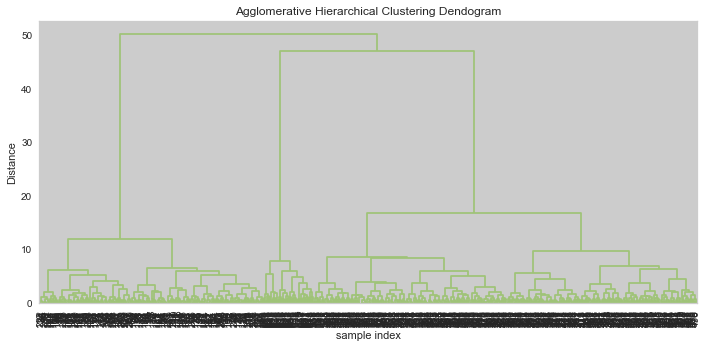

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [207]:
plt.figure(figsize=(10, 5))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90.0, color_threshold=600, leaf_font_size=10.0)
plt.tight_layout()

In [215]:
model = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [216]:
model.fit(subset_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Observations: 

-	After K-means clustering as mentioned I have checked t Hierarchical Clustering.
-	I have used Agglomerative Clustering   and default cluster from 6-9 range and checked the multiple distance metrics and linkage methods.
-	The best one distance metrics is found to be Euclidean distance and linkage is  average linkage. 
-	Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
-	I have also plot the Dendograms for the hierarchical clustering and again 3 distinct cluster we can see for   hierarchical clustering also.
- We will move ahead with average linkage.


# Cluster Profiling Using hierarchical clustering   :

In [210]:
cluster_profile2 = df.groupby("label").mean()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [211]:
cluster_profile2["count_in_each_segment"] = (
    df.groupby("label")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [212]:
# let's display cluster profiles
cluster_profile2.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
label,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

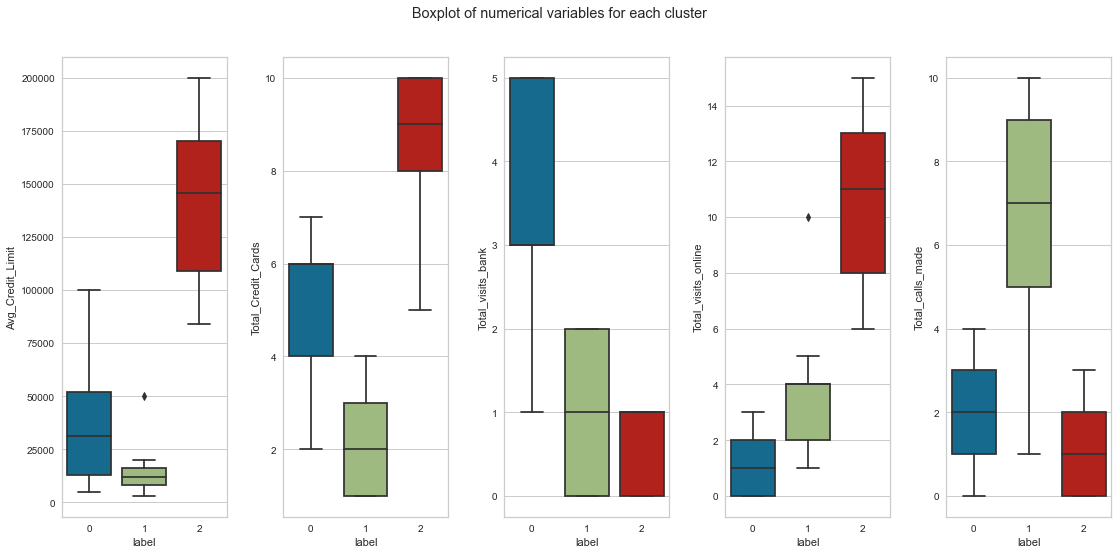

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [213]:
fig, axes = plt.subplots(1, 5, figsize=(16, 8))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for i in range(5):
    sns.boxplot(ax=axes[i], y=df[num_col[counter]], x=df["label"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

Text(0.5, 1.0, 'Cluster Wise Customer Distribution')

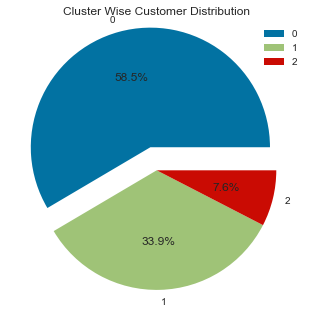

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [214]:
sizes = [368, 224, 50]
plt.pie(
    cluster_profile2["count_in_each_segment"],
    labels=[0, 1, 2],
    explode=[0.2, 0, 0],
    autopct="%1.1f%%",
)
plt.legend()
plt.title("Cluster Wise Customer Distribution")

 # Observations  :

-	--Cluster Group 0 :
-	 Max customers belong to Cluster 0 and are mean credit limit of ~33K, but these are the customers, who visit the bank more. Bank need to check service provide to these customers and reason for their visit.
-	Also these customers are less using online services, we need to check reason for this based on other parameters (Age etc.).

-	--Cluster Group 1 :
-	These are the Low credit limit customers and second large group after cluster 0.
-	These customers are using less  Avg.cards and have less bank visit rate and online use .
-	This are customer who are making more call to bank 

-	--Cluster Group 2 :
-	These are the high credit limit customers with high avg.cards .
-	These customers are using very less bank visit and have less bank call rate.
-	This are customer who are making more online visits and to bank.
-	we need to check reason for this based on other parameters (Age ,occupations etc.).


# K-means vs Hierarchical Clustering :


# Observations : 

- I have Compare clusters obtained from K-means and Hierarchical clustering techniques and for m,e both are giving good seperation at clsuter value 3 .

- For K-Mean we are getting elblow joint at 3 clsuter and  ilhouette coefficient >.5

- For  hierarchical clustering also we have get best found to be Euclidean distance and linkage is  average linkage and  Cophenetic correlation =0.8977 
 and dendogram also showing three distict clsuters

# Actionable Insights & Recommendations : 

- From current data and analysis i can see that compnay can check and validate data and groups with experts .

- -	During the cluster profiling, I have checked and plotted highlight matrix to check group and max mean values.

-	Customers with group 0 contribute to 58.5% to total customer counts ,bank should focus on these customers.

-	--Cluster Group 0 :
-	 Max customers belong to Cluster 0 and are mean credit limit of ~33K, but these are the customers, who visit the bank more. Bank need to check service provide to these customers and reason for their visit.
-	Also these customers are less using online services, we need to check reason for this based on other parameters (Age etc.).

- There are few columns such as  Total_visits_bank	Total_visits_onlineTotal_calls_made ,who has minimum value but it seems ok as their might be customer who dont reach bank ,we can check more in EDA.
-	W e have binned the Avg_Credit_Limit value to understand customer behaviour and it seems that most of the customer  have Avg_Credit_Limit limit is 3-20K.
-	Also maximum customers are holding the 4-7 cedit cards.
-	-Most of ppl who made 2 time visite to bank and  most of cusomers are using online medium and have less credit card . 9-10 credit card have  higher credit limit and prefer online medium to check services.
-	 most of customers between 21-40K have visitted bank  more times  than others ,credit limits customers.
-	we can see distinctly co-realtion between credit card and credit limit.
-	Customers with credit limit 3-20K are high in numer and have called most of time, means these low range customers are not happy with services or need extra attention.
-	During the cluster profiling, I have checked and plotted highlight matrix to check group and max mean values.

-	Customers with Clsuter  group 0 contribute to 58.5% to total customer counts, bank should focus on these customers.
-	Bank should run campaign for this customer group and check their need and service feedback, which help to reduce number of service related problem 

o	customers with Cluster Group 2 are using less  Avg.cards and have less bank visit rate and online use .This are customer who are making more call to bank ,bank should check service  which can be resolved on phone or can make online .
o	Customer cluster group 2 are customer who are making more online visits and to bank.
-	we need to check reason for this based on other parameters (Age ,occupations etc.) and bank getting more revenue with these customer as they hold even more credit cards . bank check facility to check their queries and online request and make plan to mitigate issue and improve service.

